In [ ]:
from bs4 import BeautifulSoup

In [ ]:
# Open the local file
with open("/content/html_mssiles_launched.html", "r") as f:
    html = f.read()

In [ ]:
# Parse the HTML document with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

In [ ]:
# Get all the h3 tags with the class name 'alertTableDate'
alert_table_date_tags = soup.find_all("h3", class_="alertTableDate")

In [ ]:
alert_table_date_tags[12].text.strip()

'Monday 09.10.2023'

In [ ]:
# Get all the h3 tags with the class name 'alertTableDate'
alert_table = soup.find_all("div", class_="alert_table alert_type_1")

In [ ]:
len(alert_table)

14

In [ ]:
len(alert_table_date_tags)

13

In [ ]:
# Get the specific div tag to start searching after
start_div_tag = soup.find("div", class_="ah-notifications-body")

In [ ]:
len(start_div_tag)

125

In [ ]:
import pandas as pd
alters_data_frame = pd.DataFrame(columns = ['date', 'time', 'locations'])
# Iterate over all the tags in the HTML document, starting after the specific div tag
count = 0
start_block = False
for tag in start_div_tag.descendants:
    # print(tag)
    # print(count)
    count += 1
    # Get the tag type
    tag_type = tag.name

    # # Get the tag class
    # tag_class = tag.get("class")

    # Print the tag type and tag class
    # print(f"Tag type: {tag_type}")
    if tag_type == 'h3':
      # print(tag.text.strip())
      date = tag.text.strip()
      start_block = True
    if (tag_type == 'div') & (start_block):
      for subTag in tag:
        if subTag.name == 'div':
          time = subTag.find('h5')
          time_text = time.text.strip()
          locations = subTag.text.strip().replace(time_text, "")
          alters_data_frame = pd.concat([alters_data_frame, pd.DataFrame({'date' : [date], 'time' : [time_text], 'locations' : [locations]})])

    # print(f"Tag class: {tag_class}")

In [ ]:
alters_data_frame = alters_data_frame.reset_index(drop=True)

In [ ]:
alters_data_frame['date'] = alters_data_frame['date'].apply(lambda p: p.split(' ')[1])

In [ ]:
alters_data_frame

,date,time,locations
0,21.10.2023,09:01,"Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,..."
1,21.10.2023,03:00,Sdeh Avraham
2,21.10.2023,03:00,Dekel
3,21.10.2023,03:00,"Yated, Yevul, Avshalom"
4,20.10.2023,23:02,"Gavim, Sapir College"
...,...,...,...
943,09.10.2023,19:10,"Sderot, Ivim, Nir Am"
944,09.10.2023,19:09,Erez
945,09.10.2023,19:09,Ashkelon Southern Industrial Zone
946,09.10.2023,19:01,Nachal Oz


In [ ]:
alters_data_frame['date_time'] = pd.to_datetime(alters_data_frame['date'] + ' ' + alters_data_frame['time'])

In [ ]:
alters_data_frame.sample(15)

,date,time,locations,date_time
259,16.10.2023,19:41,"Ein HaShlosha, Nirim",2023-10-16 19:41:00
729,11.10.2023,16:15,"Holon, Bat Yam, Tel Aviv - South and Jaffa",2023-11-10 16:15:00
878,10.10.2023,15:24,"Beit Oved, Beit Hanan, Irus, Rishon LeZion - East",2023-10-10 15:24:00
39,20.10.2023,18:11,Metulla,2023-10-20 18:11:00
777,11.10.2023,13:27,"Netiv HaAssara, Karmia",2023-11-10 13:27:00
174,17.10.2023,20:01,Ashkelon - North,2023-10-17 20:01:00
266,16.10.2023,18:02,"Tzohar and Ohad, Mivtachim Amioz Yesha",2023-10-16 18:02:00
388,14.10.2023,20:42,Shtulim,2023-10-14 20:42:00
183,17.10.2023,19:33,"Beit Oved, Irus, Palmachin Industrial Park, Ay...",2023-10-17 19:33:00
740,11.10.2023,15:58,Ashkelon - South,2023-11-10 15:58:00


In [ ]:
alters_data_frame['locations'] = alters_data_frame['locations'].apply(lambda p: p.replace('\n            ', ' '))

In [ ]:
alters_data_frame.loc[alters_data_frame['locations'].apply(lambda p: p.split(' -')[0]) == 'Ashdod', 'locations'] = alters_data_frame.loc[alters_data_frame['locations'].apply(lambda p: p.split(' -')[0]) == 'Ashdod', 'locations'].apply(lambda p: ", ".join(p.split(',')[0:1] + ['Ashdod -' + city for city in p.split(',')[1:]]))

In [ ]:
alters_data_frame.loc[alters_data_frame['locations'].apply(lambda p: p.split(' -')[0]) == 'Ashdod', 'locations']

0      Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
15     Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
52     Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
67            Ashdod - Northern Industrial Zone and port
187    Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
188    Ashdod - Gimmel, Vav, Zain, Ashdod - Northern ...
249    Ashdod - Het, Tet, Yod, Yod Gimmel, Yod Dalet,...
298    Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
306    Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
314           Ashdod - Northern Industrial Zone and port
392    Ashdod - Het, Tet, Yod, Yod Gimmel, Yod Dalet,...
393    Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
404    Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
465    Ashdod - Het, Tet, Yod, Yod Gimmel, Yod Dalet,...
470                           Ashdod - Gimmel, Vav, Zain
471    Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain,...
474           Ashdod - Northern Industrial Zone and port
598    Ashdod - Gimmel, Vav, Za

In [ ]:
alters_data_frame.to_excel('missles_2023_10_09_2023_10_20.xlsx')

In [ ]:
alerts_all_towns = pd.DataFrame(columns=['date_time', 'locations'])
for i, row in alters_data_frame.iterrows():
  locations = row.locations
  date_time = row.date_time
  for location in locations.split(','):
    alerts_all_towns = pd.concat([alerts_all_towns, pd.DataFrame({'locations':[location.strip()], 'date_time': [date_time]})])


In [ ]:
alerts_all_towns

,date_time,locations
0,2023-10-21 09:01:00,Ashdod - Yod Alef
0,2023-10-21 09:01:00,Ashdod - Yod Bet
0,2023-10-21 09:01:00,Ashdod - Tet Vav
0,2023-10-21 09:01:00,Ashdod - Yod Zain
0,2023-10-21 09:01:00,Ashdod - Marina
...,...,...
0,2023-09-10 19:10:00,Nir Am
0,2023-09-10 19:09:00,Erez
0,2023-09-10 19:09:00,Ashkelon Southern Industrial Zone
0,2023-09-10 19:01:00,Nachal Oz


In [ ]:
alerts_all_towns.to_excel('alerts_all_towns_2023_10_09_2023_10_20.xlsx')

In [ ]:
unique_locations = pd.DataFrame({'towns': list(alerts_all_towns['locations'].unique())})

In [ ]:
unique_locations.to_excel('unique_towns.xlsx')

In [ ]:
list(alerts_all_towns['locations'].unique())

['Ashdod - Yod Alef',
 'Ashdod - Yod Bet',
 'Ashdod - Tet Vav',
 'Ashdod - Yod Zain',
 'Ashdod - Marina',
 'Ashdod - City',
 'Sdeh Avraham',
 'Dekel',
 'Yated',
 'Yevul',
 'Avshalom',
 'Gavim',
 'Sapir College',
 'Sderot',
 'Ivim',
 'Nir Am',
 'Ashkelon - North',
 'Zikim',
 'Ashkelon - South',
 'Ashkelon Southern Industrial Zone',
 'Nir- Um shooting range',
 'Mefalsim',
 'Ashdod - Ashdod - Het',
 'Ashdod - Tet',
 'Ashdod - Yod',
 'Ashdod - Yod Gimmel',
 'Ashdod - Yod Dalet',
 'Ashdod - Te*',
 'Ashdod - Ashdod - Gimmel',
 'Ashdod - Vav',
 'Ashdod - Zain',
 'Ashdod - Ashdod - Alef',
 'Ashdod - Bet',
 'Ashdod - Dalet',
 'Ashdod - Heh',
 "Be'er Tuvia",
 "Mavki'im",
 'Karmia',
 'Yad Mordechai',
 "Re'em Industrial Park",
 'Orot',
 "Sa'ad",
 'Ashkelon Northern Industrial Zone',
 'Netiv HaAssara',
 'Beit Ezra',
 'Yod Bet',
 'Tet Vav',
 'Yod Zain',
 'Marina',
 'City',
 'Ashdod - Gimmel',
 'Vav',
 'Zain',
 'Ad Halom Industrial Zone',
 'Ashdod - Alef',
 'Bet',
 'Dalet',
 'Heh',
 'Ashdod - Het',
 

In [ ]:
alters_data_frame['locations'].nunique()

416

In [ ]:
alters_data_frame['locations'].unique()[12]

'Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain, Marina, City, Ashdod - Het, Tet, Yod, Yod\n            Gimmel, Yod Dalet, Te*, Ashdod - Gimmel, Vav, Zain, Ashdod - Alef, Bet, Dalet, Heh'

In [ ]:
split_dict = {}

In [ ]:
" ".join(['a','b','c'])

'a b c'

In [ ]:
split_dict['Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain, Marina, City'] = 'Ashdod - Yod Alef,Ashdod - Yod Bet,Ashdod - Tet Vav, Ashdod - Yod Zain,Ashdod - Marina, Ashdod - City'

In [ ]:
split_dict['Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain, Marina, City, Ashdod - Het, Tet, Yod, Yod\n            Gimmel, Yod Dalet, Te*, Ashdod - Gimmel, Vav, Zain, Ashdod - Alef, Bet, Dalet, Heh'] = 'Ashdod - Yod Alef, Yod Bet, Tet Vav, Yod Zain, Marina, City, Ashdod - Het, Tet, Yod, Yod Gimmel, Yod Dalet, Te*, Ashdod - Gimmel, Vav, Zain, Ashdod - Alef, Bet, Dalet, Heh'

# GeoLocation

In [ ]:
import pandas as pd

In [ ]:
import geopandas as gpd

In [ ]:
all_towns = pd.read_excel('/content/alerts_all_towns_2023_10_09_2023_10_20.xlsx')

In [ ]:
all_towns

,Unnamed: 0,date_time,locations
0,0,2023-10-21 09:01:00,Ashdod - Yod Alef
1,0,2023-10-21 09:01:00,Ashdod - Yod Bet
2,0,2023-10-21 09:01:00,Ashdod - Tet Vav
3,0,2023-10-21 09:01:00,Ashdod - Yod Zain
4,0,2023-10-21 09:01:00,Ashdod - Marina
...,...,...,...
2339,0,2023-09-10 19:10:00,Nir Am
2340,0,2023-09-10 19:09:00,Erez
2341,0,2023-09-10 19:09:00,Ashkelon Southern Industrial Zone
2342,0,2023-09-10 19:01:00,Nachal Oz


In [ ]:
geolocation = pd.read_excel('/content/geolocation_israel_missles_rocket_2023_10_09_2023_10_20.xlsx')

In [ ]:
geolocation

,towns,Latitude,Longitude
0,Ashdod - Yod Alef,31.804381,34.655314
1,Ashdod - Yod Bet,31.804381,34.655314
2,Ashdod - Tet Vav,31.804381,34.655314
3,Ashdod - Yod Zain,31.804381,34.655314
4,Ashdod - Marina,31.794780,34.628278
...,...,...,...
584,Kuseife,31.247137,35.088105
585,Gvulot,31.210331,34.465770
586,Sdeh Zvi,31.449468,34.710769
587,Pa'amei Tashaz,31.440169,34.693162


In [ ]:
all_towns = all_towns.drop(columns='Unnamed: 0')

In [ ]:
merged_locations_with_date_time = pd.merge(all_towns, geolocation, left_on='locations', right_on='towns')

In [ ]:
merged_locations_with_date_time

,date_time,locations,towns,Latitude,Longitude
0,2023-10-21 09:01:00,Ashdod - Yod Alef,Ashdod - Yod Alef,31.804381,34.655314
1,2023-10-20 21:03:00,Ashdod - Yod Alef,Ashdod - Yod Alef,31.804381,34.655314
2,2023-10-20 20:01:00,Ashdod - Yod Alef,Ashdod - Yod Alef,31.804381,34.655314
3,2023-10-20 12:03:00,Ashdod - Yod Alef,Ashdod - Yod Alef,31.804381,34.655314
4,2023-10-19 16:00:00,Ashdod - Yod Alef,Ashdod - Yod Alef,31.804381,34.655314
...,...,...,...,...,...
2339,2023-10-10 16:30:00,Kuseife,Kuseife,31.247137,35.088105
2340,2023-10-10 14:19:00,Gvulot,Gvulot,31.210331,34.465770
2341,2023-10-10 12:39:00,Sdeh Zvi,Sdeh Zvi,31.449468,34.710769
2342,2023-10-10 12:39:00,Pa'amei Tashaz,Pa'amei Tashaz,31.440169,34.693162


In [ ]:
merged_locations_with_date_time['locations'] = merged_locations_with_date_time['locations'].apply(lambda p: p.replace("Degania Ashdod - Bet", "Degania Bet"))

In [ ]:
merged_locations_with_date_time['locations'] = merged_locations_with_date_time['locations'].apply(lambda p: 'Ashdod - Yod Dalet' if p=='Yod Ashdod - Dalet' else p)

In [ ]:
merged_locations_with_date_time.loc[merged_locations_with_date_time['locations'].apply(lambda p: 'Ashdod' in p),'locations'].unique()

array(['Ashdod - Yod Alef', 'Ashdod - Yod Bet', 'Ashdod - Tet Vav',
       'Ashdod - Yod Zain', 'Ashdod - Marina', 'Ashdod - City',
       'Ashdod - Het', 'Ashdod - Tet', 'Ashdod - Yod',
       'Ashdod - Yod Gimmel', 'Ashdod - Yod Dalet', 'Ashdod - Te*',
       'Ashdod - Gimmel', 'Ashdod - Vav', 'Ashdod - Zain',
       'Ashdod - Alef', 'Ashdod - Bet', 'Ashdod - Dalet', 'Ashdod - Heh',
       'Ashdod - Ad Halom Industrial Zone',
       'Ashdod - Northern Industrial Zone and port', 'Ashdod - Shtulim',
       'Ashdod Yacov Ichud'], dtype=object)

In [ ]:
merged_locations_with_date_time.loc[merged_locations_with_date_time['locations'].apply(lambda p: 'Heh' in p),'locations'].unique()

array(['Ashdod - Heh'], dtype=object)

In [ ]:
merged_locations_with_date_time = merged_locations_with_date_time.drop(columns = 'towns')

In [ ]:
merged_locations_with_date_time.to_excel('geolocation_israel_rockets_2023_10_09_2023_10_20.xlsx')

In [ ]:
merged_locations_with_date_time = merged_locations_with_date_time.loc[merged_locations_with_date_time['Latitude'].notna()].reset_index(drop=True)

In [ ]:
merged_locations_with_date_time.to_excel('geolocation_israel_rockets_2023_10_09_2023_10_20.xlsx')

In [ ]:
geometry = gpd.points_from_xy(x=merged_locations_with_date_time['Longitude'], y=merged_locations_with_date_time['Latitude'])

In [ ]:
merged_locations_with_date_time_gdf = gpd.GeoDataFrame(merged_locations_with_date_time, crs=4326, geometry=geometry)

<Axes: >

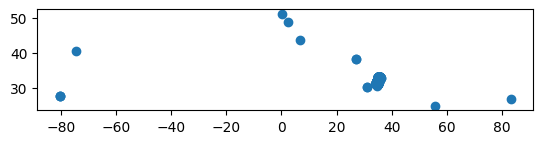

In [ ]:
merged_locations_with_date_time_gdf.plot()

In [ ]:
merged_locations_with_date_time_gdf.to_file('merged_locations_with_date_time_gdf.geojson')

In [ ]:
gdf = gpd.read_file('/content/merged_locations_with_date_time_gdf.geojson')

In [ ]:
gdf['date'] =gdf['date_time'].dt.date

In [ ]:
gdf['date'].unique()

array([datetime.date(2023, 10, 21), datetime.date(2023, 10, 20),
       datetime.date(2023, 10, 19), datetime.date(2023, 10, 17),
       datetime.date(2023, 10, 16), datetime.date(2023, 10, 14),
       datetime.date(2023, 10, 13), datetime.date(2023, 10, 12),
       datetime.date(2023, 10, 11), datetime.date(2023, 10, 10),
       datetime.date(2023, 10, 18), datetime.date(2023, 10, 9),
       datetime.date(2023, 10, 15)], dtype=object)

In [ ]:
import datetime

In [ ]:
gdf.loc[gdf['date'] == datetime.date(2023, 9, 10),'date'] = datetime.date(2023, 10, 9)

In [ ]:
gdf['time'] = gdf['date_time'].dt.time

In [ ]:
gdf['date_time'] = pd.to_datetime(gdf['date'].astype(str) + ' ' + gdf['time'].astype(str))

In [ ]:
gdf

,date_time,locations,Latitude,Longitude,geometry,date,time
0,2023-10-21 09:01:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (34.65531 31.80438),2023-10-21,09:01:00
1,2023-10-20 21:03:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (34.65531 31.80438),2023-10-20,21:03:00
2,2023-10-20 20:01:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (34.65531 31.80438),2023-10-20,20:01:00
3,2023-10-20 12:03:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (34.65531 31.80438),2023-10-20,12:03:00
4,2023-10-19 16:00:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (34.65531 31.80438),2023-10-19,16:00:00
...,...,...,...,...,...,...,...
1999,2023-10-10 16:44:00,Kfar Shmaryahu,32.187276,34.821642,POINT (34.82164 32.18728),2023-10-10,16:44:00
2000,2023-10-10 15:46:00,Kfar Shmaryahu,32.187276,34.821642,POINT (34.82164 32.18728),2023-10-10,15:46:00
2001,2023-10-10 14:19:00,Gvulot,31.210331,34.465770,POINT (34.46577 31.21033),2023-10-10,14:19:00
2002,2023-10-10 12:39:00,Sdeh Zvi,31.449468,34.710769,POINT (34.71077 31.44947),2023-10-10,12:39:00


In [ ]:
gdf_3857 = gdf.to_crs(3857)

In [ ]:
gdf_3857.head()

,date_time,locations,Latitude,Longitude,geometry,date,time
0,2023-10-21 09:01:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (3857811.908 3737659.896),2023-10-21,09:01:00
1,2023-10-20 21:03:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (3857811.908 3737659.896),2023-10-20,21:03:00
2,2023-10-20 20:01:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (3857811.908 3737659.896),2023-10-20,20:01:00
3,2023-10-20 12:03:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (3857811.908 3737659.896),2023-10-20,12:03:00
4,2023-10-19 16:00:00,Ashdod - Yod Alef,31.804381,34.655314,POINT (3857811.908 3737659.896),2023-10-19,16:00:00


In [ ]:
gdf_3857 = gdf_3857.drop(columns=['Latitude', 'Longitude', 'date','time'])

In [ ]:
gdf_3857

,date_time,locations,geometry
0,2023-10-21 09:01:00,Ashdod - Yod Alef,POINT (3857811.908 3737659.896)
1,2023-10-20 21:03:00,Ashdod - Yod Alef,POINT (3857811.908 3737659.896)
2,2023-10-20 20:01:00,Ashdod - Yod Alef,POINT (3857811.908 3737659.896)
3,2023-10-20 12:03:00,Ashdod - Yod Alef,POINT (3857811.908 3737659.896)
4,2023-10-19 16:00:00,Ashdod - Yod Alef,POINT (3857811.908 3737659.896)
...,...,...,...
1999,2023-10-10 16:44:00,Kfar Shmaryahu,POINT (3876327.466 3787918.699)
2000,2023-10-10 15:46:00,Kfar Shmaryahu,POINT (3876327.466 3787918.699)
2001,2023-10-10 14:19:00,Gvulot,POINT (3836711.922 3660094.840)
2002,2023-10-10 12:39:00,Sdeh Zvi,POINT (3863985.177 3691259.761)


In [ ]:
gdf_3857.to_file('israel_rockets_3857_2023_09_09_2023_10_20.geojson')

## Merge rocket sites with rocket launched random poitns

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
gdf = gpd.read_file('/content/israel_rockets_3857_2023_09_09_2023_10_20.geojson')

In [ ]:
df = pd.read_excel('/content/Rocket_launches_random.xlsx')

In [ ]:
df

,rand_point_id,east_g,north_g
0,0,3834231,3700385
1,1,3834725,3698662
2,2,3835211,3698701
3,3,3835067,3698573
4,4,3838228,3701487
...,...,...,...
8011,8011,3821267,3678356
8012,8012,3819211,3677224
8013,8013,3819196,3679516
8014,8014,3820560,3676478


In [ ]:
df.iloc[0:2004]

,rand_point_id,east_g,north_g
0,0,3834231,3700385
1,1,3834725,3698662
2,2,3835211,3698701
3,3,3835067,3698573
4,4,3838228,3701487
...,...,...,...
1999,1999,3833160,3699221
2000,2000,3834487,3701229
2001,2001,3836828,3701541
2002,2002,3836188,3703754


In [ ]:
gdf = pd.concat([gdf, df.iloc[0:2004]], axis =1 )

In [ ]:
gdf = gdf.drop(columns='rand_point_id')

In [ ]:
gdf.to_file('israel_rockets_with_random_launch_3857_2023_09_09_2023_10_20.geojson')

In [ ]:
gdf.drop(columns='geometry').to_excel('israel_rockets_with_random_launch_3857_2023_09_09_2023_10_20.xlsx')